In [1]:
import pandas as pd
df = pd.read_csv("Churn_modelling.csv")

In [2]:
df.shape

(10000, 12)

In [3]:
df.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df1 = pd.get_dummies(data = df,columns=['Geography'])

In [6]:
X=df1.drop(['Surname','Exited'],axis='columns')
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [7]:
X.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [8]:
tenure_yes=df[df.Exited==1].Tenure
tenure_no=df[df.Exited==0].Tenure

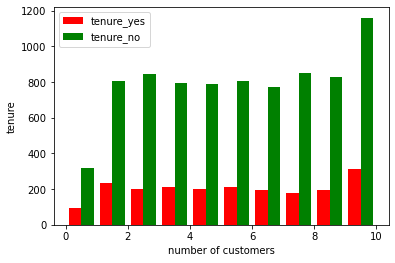

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("number of customers")
plt.ylabel("tenure")
plt.hist([tenure_yes,tenure_no],rwidth=0.8 ,color=['red', 'green'] , label=['tenure_yes','tenure_no'] )
plt.legend()

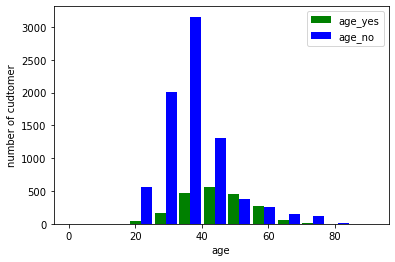

In [10]:
age_yes=df[df.Exited==1].Age
age_no=df[df.Exited==0].Age
plt.ylabel("number of cudtomer")
plt.xlabel("age")
plt.hist([age_yes,age_no],rwidth=0.89,color=['green','blue'] ,label=['age_yes','age_no'])
plt.plot([age_yes,])
plt.legend()

In [11]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy=MinMaxScaler()
Y=df.Exited

In [12]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
credit_yes = df[df.Exited==0].CreditScore
credit_no=df[df.Exited==1].CreditScore

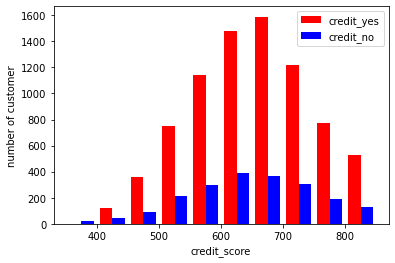

In [14]:
plt.xlabel("credit_score")
plt.ylabel("number of customer")
plt.hist([credit_yes,credit_no] , color=['red','blue'],label=['credit_yes' , 'credit_no'])
plt.legend()

In [15]:
df.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1


In [16]:
col = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts','EstimatedSalary'].copy()

In [17]:
X[col] = sx.fit_transform(X[col])

In [18]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
x_train.shape, x_test.shape

((7500, 12), (2500, 12))

In [20]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(50,input_shape=(12,),activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,input_shape=(12,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
                                                                )

In [21]:
model.fit(x_train,y_train , epochs=50)

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7917
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.8064
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8136
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8196
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.8231
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8303
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.3720 - accuracy: 0.8431
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8492
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8504
Epoch 10/50
235/235 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8531

In [22]:
model.evaluate(x_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8576


[0.35523074865341187, 0.8575999736785889]

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
tf.math.confusion_matrix(label=y_test,y_pred)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
import seaborn as sn
sn.heatmap(cm, annot=True)